# Simon Algorithm
Find a secret s so that f(x) = f(y) if y = x+s

In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print('Init state = ',initState)
    qr = QuantumRegister(n,"q")
    qc = ClassicalRegister(n, "c")
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHistogram(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qboj = assemble(circ, shots=shots)
    results = qasm_sim.run(qboj).result()
    counts = results.get_counts()
    return counts

## Simon Circuit

In [60]:
def simonCircuit(b):
    n = len(b)
    circ = QuantumCircuit(2*n, 2*n)
    circ.h(range(n))
    
    circ.barrier()
    #circ += simon_oracle(b)
    circ.compose(simon_oracle(b), inplace=True)
    circ.barrier()
    
#     circ.measure(range(n, 2*n), range(n, 2*n))
#     circ.barrier()
    
    circ.h(range(n))
    circ.measure(range(n), range(n))
    return circ

In [61]:
b = '110'
circuit = simonCircuit(b)
# Secret s = 110

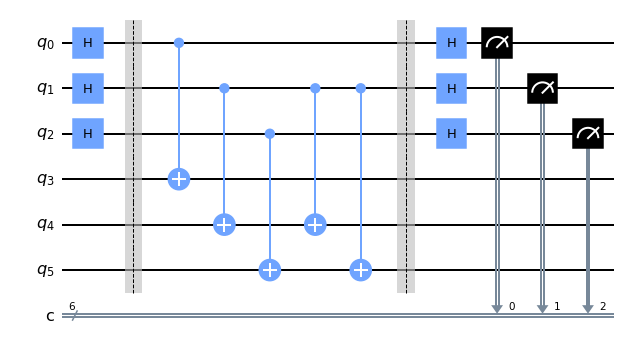

In [62]:
circuit.draw();

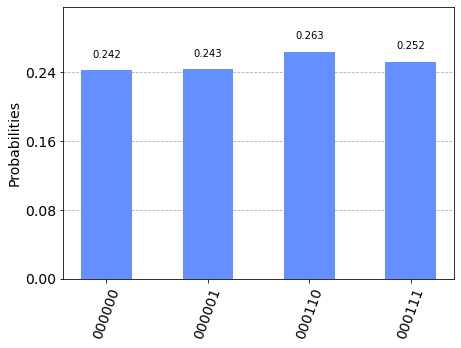

In [63]:
w = getHistogram(1024, circuit)
plot_histogram(w);

In [64]:
for z in w:
    print(z[3:])

001
111
110
000


In [65]:
# j = 110, 000, 001, 111  => Only s = 110 such that j.s = 0
# j = 00, 01 => Only s = 10 such that j.s = 0

In [67]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in w:
    print( '{}.{} = {} (mod 2)'.format(b, z[3:], bdotz(b,z)) )

110.001 = 0 (mod 2)
110.111 = 0 (mod 2)
110.110 = 0 (mod 2)
110.000 = 0 (mod 2)
